In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud
import requests
from wordcloud import WordCloud, ImageColorGenerator
from google.colab.patches import cv2_imshow
import cv2

In [36]:
def musinsa_words(words_list):
  word_list = []
  for goods in words_list:
    words = goods.split(',')
    for word in words:
      word_list.append(word)
  return word_list

def drop_words(word_list):
  word_list_drop = []
  for word in word_list:
    if len(word) != 1:
      word_list_drop.append(word)

  return word_list_drop

def musinsa_word_cloud(word_list_drop):
  count = Counter(word_list_drop)

  wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
              background_color='white', width=1000, height=1000, max_words=100, max_font_size=300, colormap = 'spring')
  wc.generate_from_frequencies(dict(count))
  wc.to_file("wc_title.png")

  img = cv2.imread('wc_title.png', cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

def run_imshow(data):
  word_list = musinsa_words(data)
  word_list_drop = drop_words(word_list)
  musinsa_word_cloud(word_list_drop)

In [34]:
goods_explain = pd.read_csv('/content/goods_explain.csv', index_col=0)
goods_explain.dropna(inplace=True)

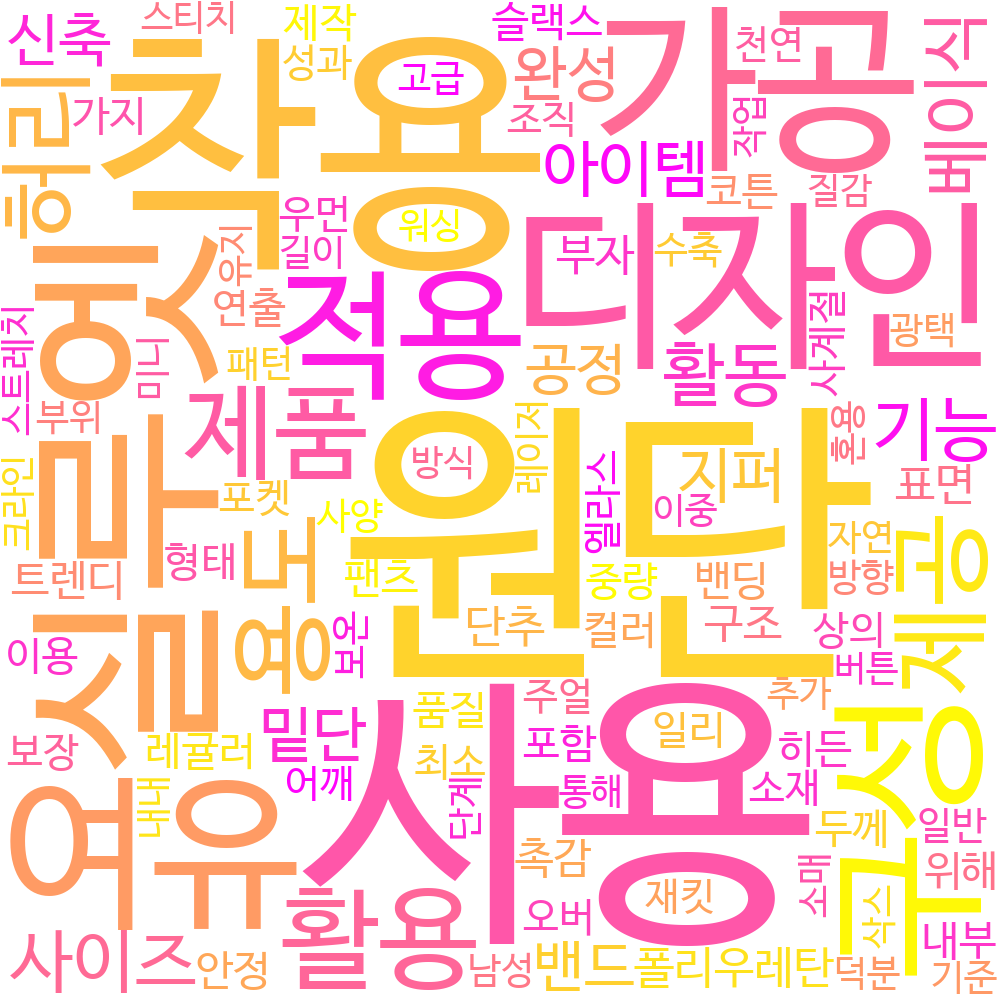

In [35]:
run_imshow(goods_explain['단어리스트'])

In [30]:
word_list = musinsa_words(goods_explain['단어리스트'])
word_list_drop = drop_words(word_list)

In [ ]:
len(word_list_drop)

59556

In [ ]:
count = Counter(word_list_drop)

In [ ]:
def to_df(data):
  key_data = list(data.keys())
  values_data = list(data.values())

  word_dic = {
      'word' : [],
      'conunt' : []
  }

  for key, values in zip(key_data, values_data):
    word_dic['word'].append(key)
    word_dic['conunt'].append(values)

  word_df = pd.DataFrame(word_dic)
  
  return word_df

In [ ]:
count_df = to_df(count)

In [ ]:
goods_count = count_df.sort_values('conunt', ascending=False).reset_index().drop('index', axis=1)

In [ ]:
goods_count.to_csv('goods_count.csv')

In [ ]:
goods_count[goods_count['conunt'] > 95]

,word,conunt
0,원단,1831
1,사용,1641
2,착용,1268
3,실루엣,784
4,디자인,747
...,...,...
172,안단,99
173,세계,98
174,셔츠,97
175,데님,97
